# Project Name: Flight Fare Prediction 
#### using ML and Auto SK Learn(Auto ML)

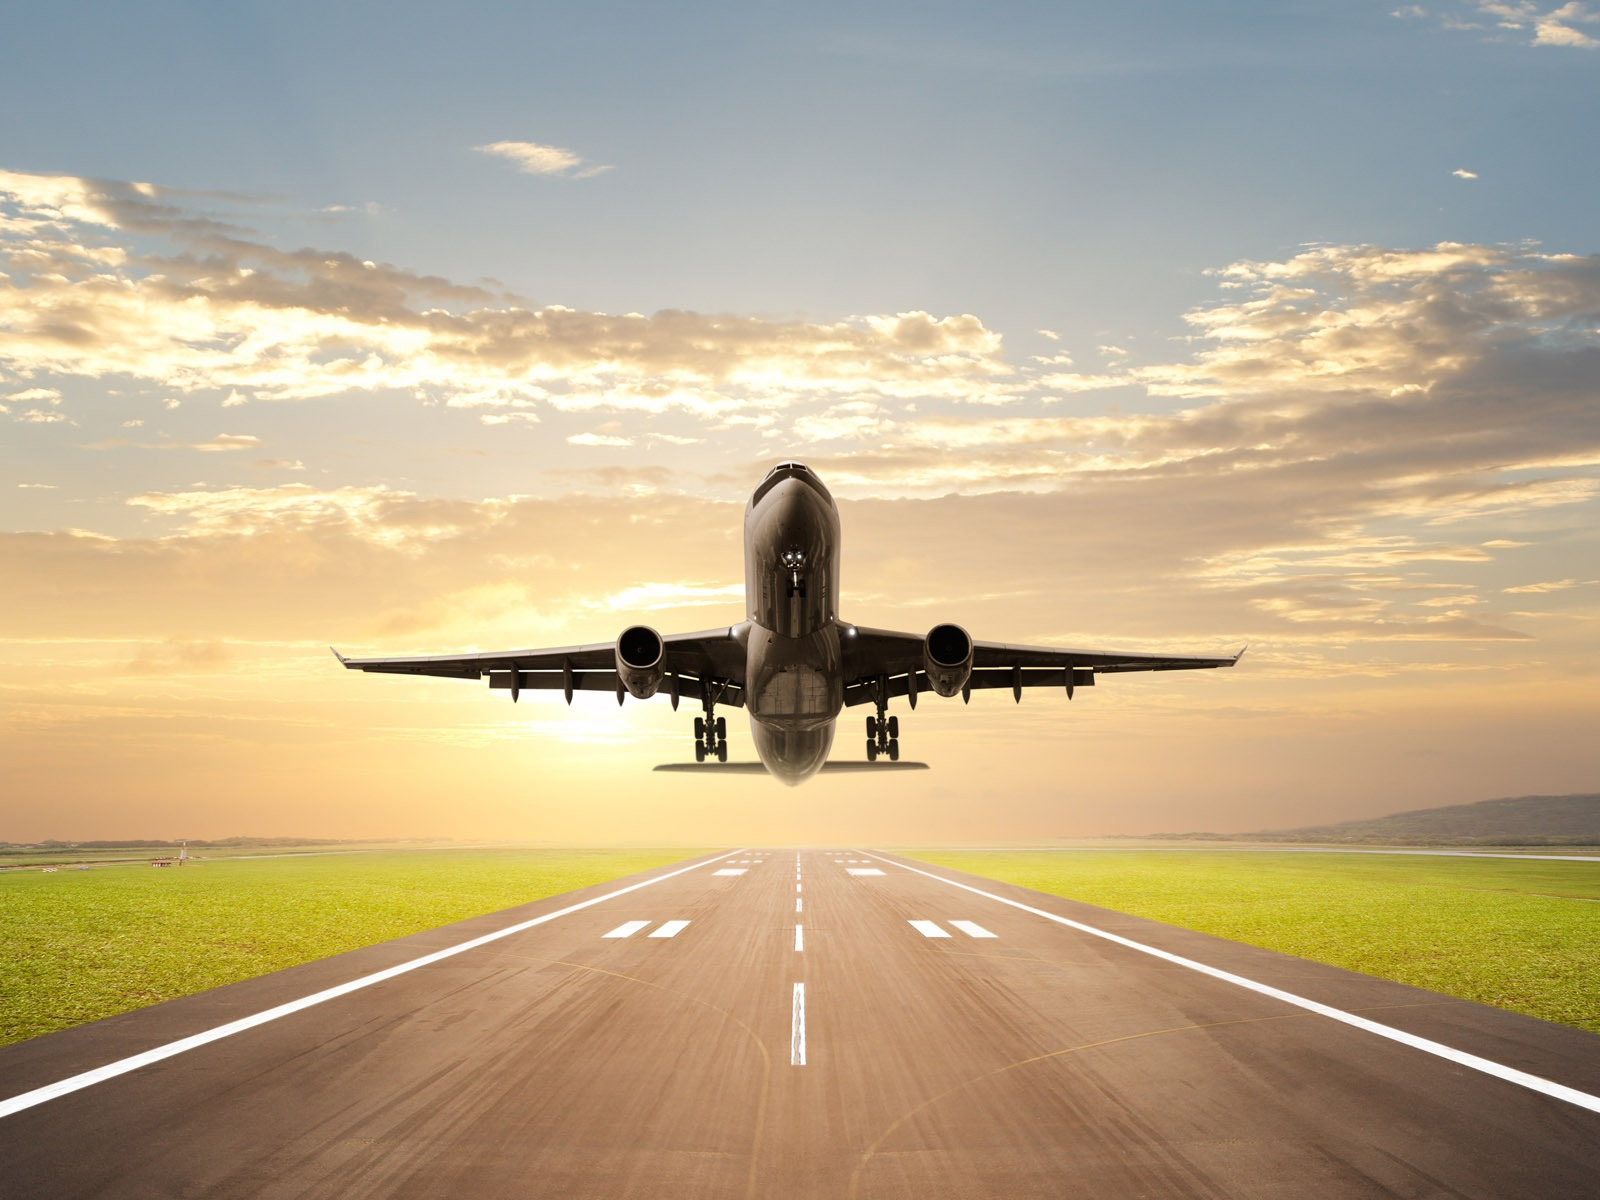

#### In this project we will be predicting the Fare of a flight a person has to give on inputting the data using the normal Machine Learning techniques then we will see how we can do the same thing with the help of using Auto SK Learn which is a Auto ML Library.

## Context :

#### We have often heared travellers saying Flight TIckets are often very unpredictable and are very hard to guess. If one might see a  price today and checks the same flight price tommorow it's a whole different story by then. 

#### Let us create a Machine Learning Model which will help us in predicting the prices of a flight on inputting some of the attributes. Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### We will do the following things in our Notebook:
- Data Analysis 
- Feature Engineering 
- Feature Selection
- Model Building using ML
- Modle Building using Auto SK Learn(Auto ML)

### So let's dive in and read our data, but first we will import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading our Data set

In [ ]:
df= pd.read_csv("flight data.csv") 

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df1= pd.read_csv("flight test.csv")

In [6]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
df1.shape

(2671, 10)

### We will combine both the data for the purpose of Feature Engineering

In [8]:
total_df = pd.concat([df, df1], sort=False)

In [9]:
total_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [11]:
total_df.shape

(13354, 11)

### Understanding our Data

#### Size of training set: 10683 records

#### Size of test set: 2671 records

### FEATURES: 

#### Airline: The name of the airline.

#### Date_of_Journey: The date of the journey

#### Source: The source from which the service begins.

#### Destination: The destination where the service ends.

#### Route: The route taken by the flight to reach the destination.

#### Dep_Time: The time when the journey starts from the source.

#### Arrival_Time: Time of arrival at the destination.

#### Duration: Total duration of the flight.

#### Total_Stops: Total stops between the source and destination.

#### Additional_Info: Additional information about the flight

#### Price: The price of the ticket

### Data Analysis

#### We will be doing this on our Train data only , By Rhaman

In [12]:
df['Airline'].value_counts() ## checking for airline data

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### Let's see the relation b/w airline and price

<function matplotlib.pyplot.show(close=None, block=None)>

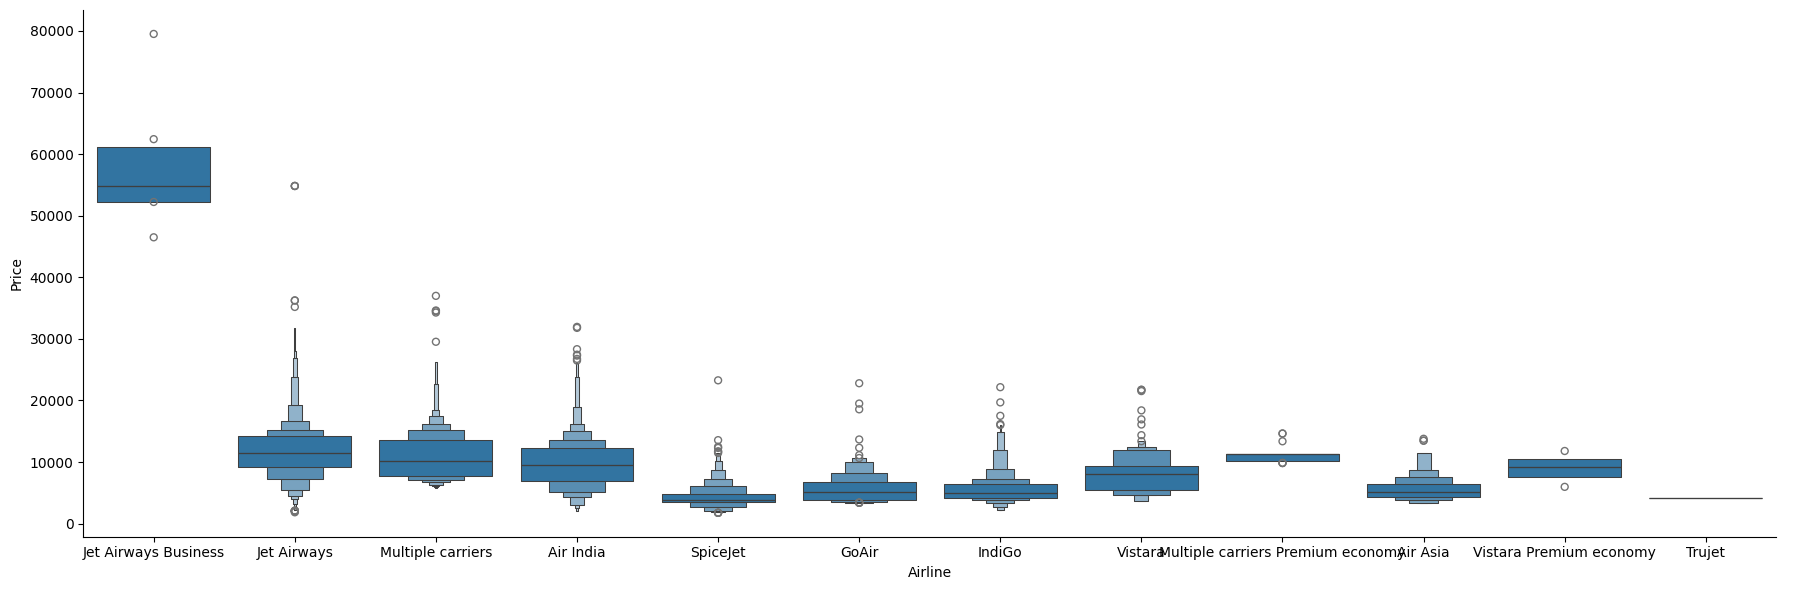

In [13]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### Jet airways business have the highest fare

In [14]:
df['Source'].value_counts() ## checking for Source

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

### Finding relation b/w Source and price

<function matplotlib.pyplot.show(close=None, block=None)>

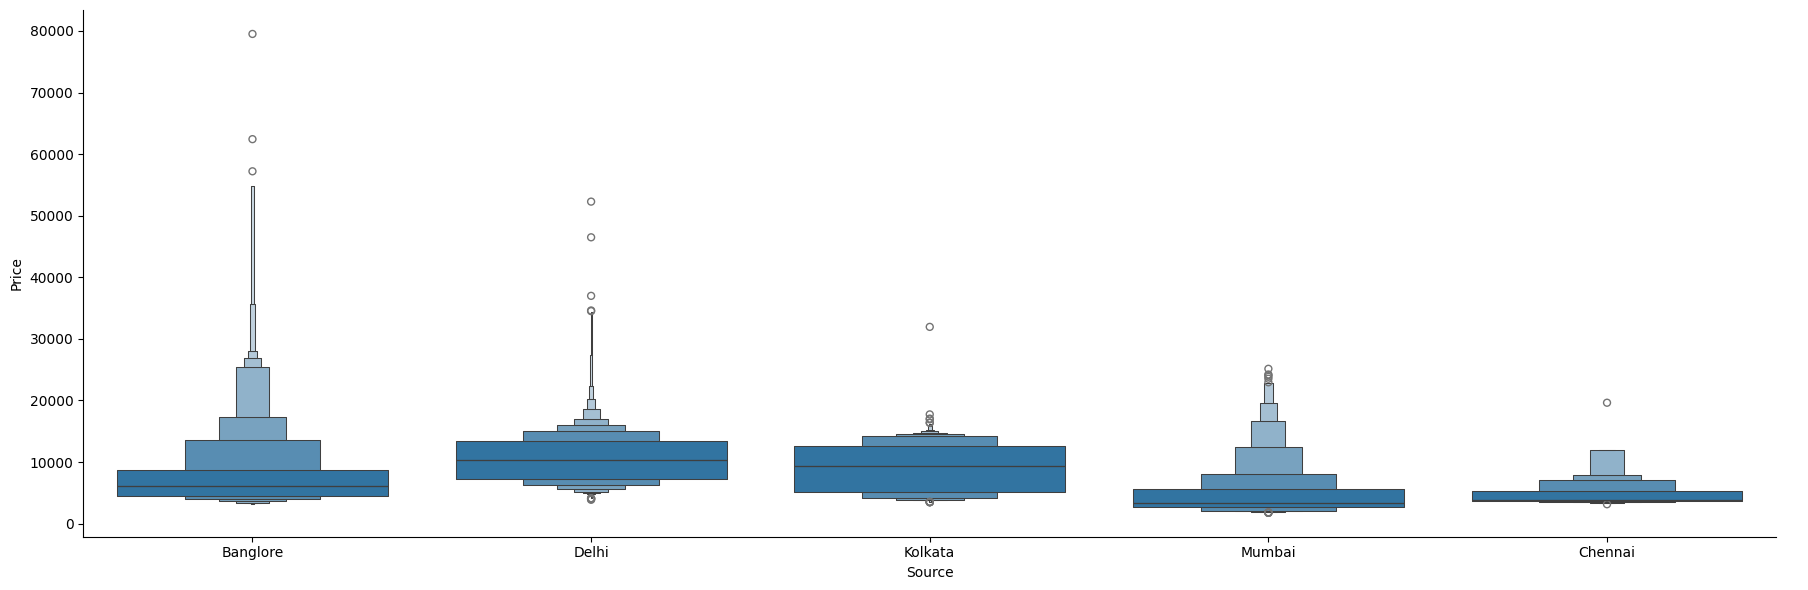

In [15]:
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [16]:
df['Destination'].value_counts() ## checking for Destination

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

### Doing the same for destination

<function matplotlib.pyplot.show(close=None, block=None)>

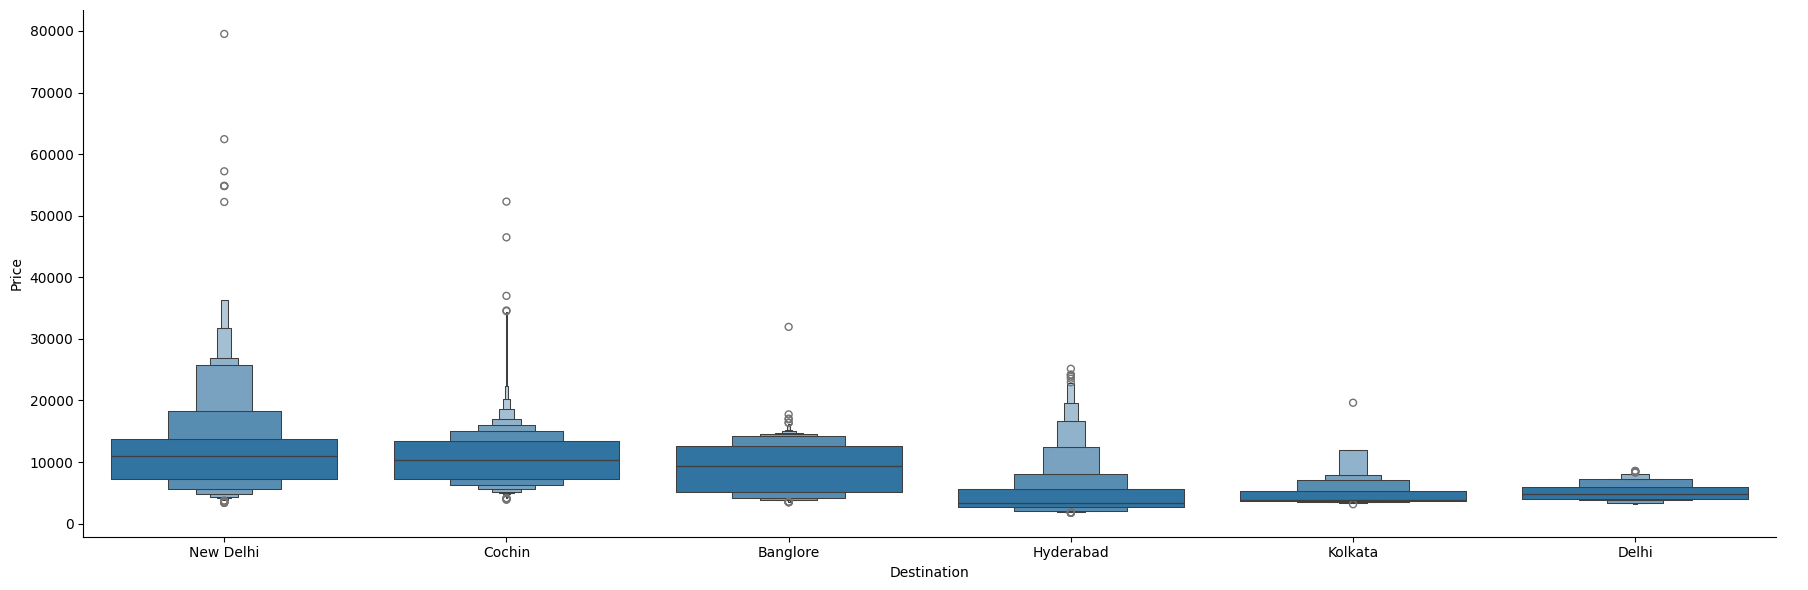

In [17]:
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [18]:
df['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
37h 10m      1
32h 20m      1
40h 20m      1
13h 35m      1
47h 40m      1
Name: count, Length: 368, dtype: int64

### Feature Engineering

In [19]:
total_df['Date']=total_df['Date_of_Journey'].str.split('/').str[0]
total_df['Month']=total_df['Date_of_Journey'].str.split('/').str[1]
total_df['Year']=total_df['Date_of_Journey'].str.split('/').str[2]

In [20]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [21]:
total_df=total_df.drop(['Date_of_Journey'],axis=1)

In [22]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [23]:
total_df['Date']=total_df['Date'].astype(int)
total_df['Month']=total_df['Month'].astype(int)
total_df['Year']=total_df['Year'].astype(int)

In [24]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
dtype: object

In [25]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


### Let's see if Additional Info has any effect on price

In [26]:
total_df['Additional_Info'].value_counts()

Additional_Info
No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

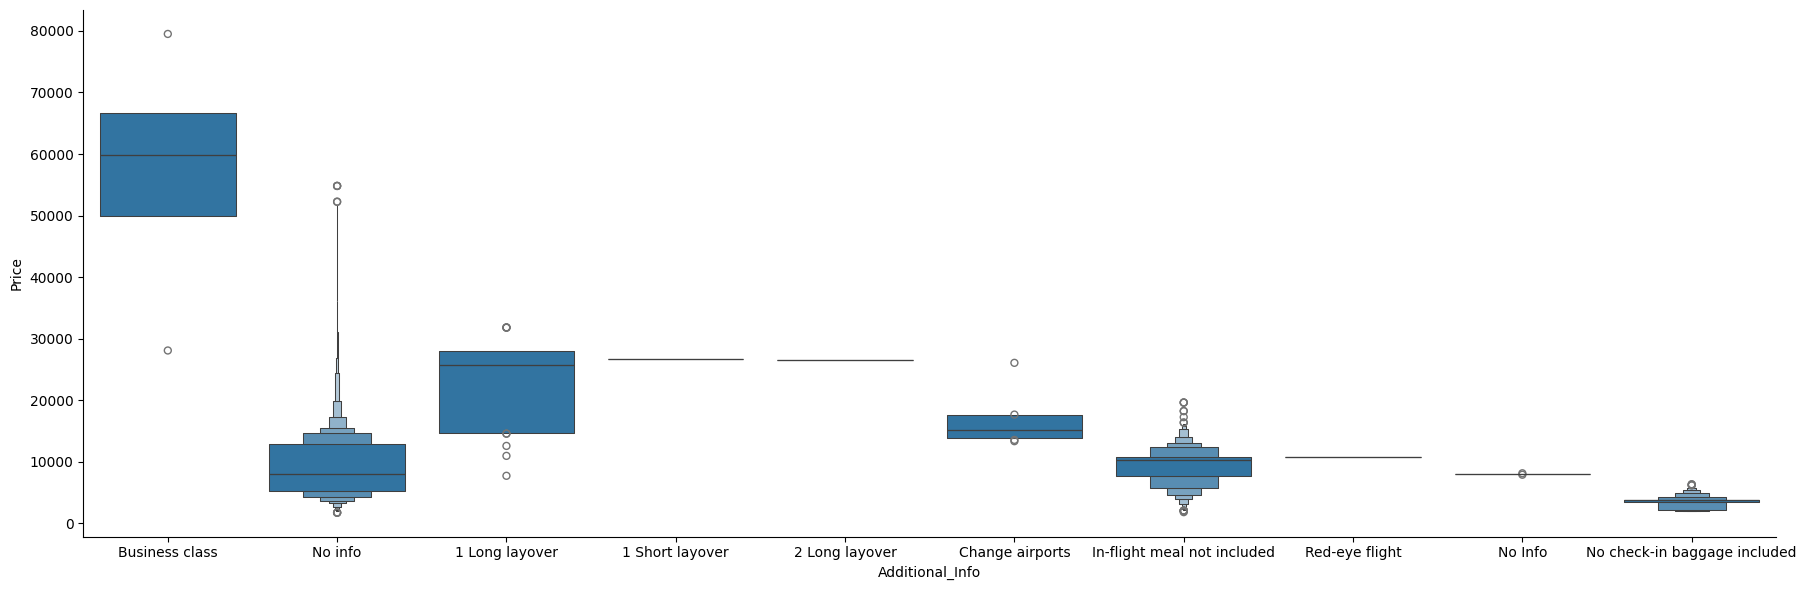

In [27]:
sns.catplot(y='Price',x='Additional_Info',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### Filtering the Arrival Time

In [28]:
total_df['Arrival_Time']=total_df['Arrival_Time'].str.split(' ').str[0]

In [29]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


### Let's anlyse our Stop coloumn

In [30]:
total_df['Total_Stops'].value_counts()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [31]:
total_df['Total_Stops']=total_df['Total_Stops'].fillna('1 stop')

In [32]:
total_df['Total_Stops'].isnull().sum()

np.int64(0)

### Let us make the Stop column numeric

In [33]:
total_df['Total_Stops']=total_df['Total_Stops'].replace('non-stop','0 stop')

In [34]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [35]:
total_df['Stop'] = total_df['Total_Stops'].str.split(' ').str[0]

In [36]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [37]:
total_df=total_df.drop(['Total_Stops'],axis=1)

In [38]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [39]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Stop                object
dtype: object

In [40]:
total_df['Stop']=total_df['Stop'].astype(int)

In [41]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Stop                 int64
dtype: object

### Similarly we will try to convert all the features to numerical variables

In [42]:
total_df['Arrival_Hour'] = total_df['Arrival_Time'] .str.split(':').str[0]
total_df['Arrival_Minute'] = total_df['Arrival_Time'] .str.split(':').str[1]

In [43]:
total_df['Arrival_Hour']=total_df['Arrival_Hour'].astype(int)
total_df['Arrival_Minute']=total_df['Arrival_Minute'].astype(int)
total_df=total_df.drop(['Arrival_Time'],axis=1)

In [44]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [45]:
total_df['Departure_Hour'] = total_df['Dep_Time'] .str.split(':').str[0]
total_df['Departure_Minute'] = total_df['Dep_Time'] .str.split(':').str[1]

In [46]:
total_df['Departure_Hour']=total_df['Departure_Hour'].astype(int)
total_df['Departure_Minute']=total_df['Departure_Minute'].astype(int)
total_df=total_df.drop(['Dep_Time'],axis=1)

In [47]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


### Let's devide the route into different columns

In [48]:
total_df['Route_1']= total_df['Route'].str.split('→ ').str[0]
total_df['Route_2']= total_df['Route'].str.split('→ ').str[1]
total_df['Route_3']= total_df['Route'].str.split('→ ').str[2]
total_df['Route_4']= total_df['Route'].str.split('→ ').str[3]
total_df['Route_5']= total_df['Route'].str.split('→ ').str[4]

In [49]:
total_df['Route_1'] = total_df['Route_1'].fillna("None")
total_df['Route_2'] = total_df['Route_2'].fillna("None")
total_df['Route_3'] = total_df['Route_3'].fillna("None")
total_df['Route_4'] = total_df['Route_4'].fillna("None")
total_df['Route_5'] = total_df['Route_5'].fillna("None")


In [50]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [51]:
total_df=total_df.drop(['Route'],axis=1)
total_df=total_df.drop(['Duration'],axis=1)

In [52]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [53]:
total_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Stop                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

#### We will deal with price 

In [54]:
total_df['Price'] = total_df['Price'].fillna(total_df['Price'].mean())


In [55]:
total_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [56]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


### Let us now convert all these varibales in the form our model can understand, here we will use Lable Enocoder


In [57]:
! pip install scikit-learn

/bin/bash: line 1: /media/rahemur0910/ExtraSSD/backup_files/code/Flight-Fare-Detection-Using-SK-Learn/jupyter_env/bin/pip: cannot execute: required file not found


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le= LabelEncoder()

In [60]:
total_df["Airline"]=le.fit_transform(total_df['Airline'])
total_df["Source"]=le.fit_transform(total_df['Source'])
total_df["Destination"]=le.fit_transform(total_df['Destination'])
total_df["Additional_Info"]=le.fit_transform(total_df['Additional_Info'])
total_df["Route_1"]=le.fit_transform(total_df['Route_1'])
total_df["Route_2"]=le.fit_transform(total_df['Route_2'])
total_df["Route_3"]=le.fit_transform(total_df['Route_3'])
total_df["Route_4"]=le.fit_transform(total_df['Route_4'])
total_df["Route_5"]=le.fit_transform(total_df['Route_5'])

In [61]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


### We can also perform One Hot Encoding on the categorical variables

### Let us drop the year column because we have the dataset of the same year

In [62]:
total_df= total_df.drop(['Year'], axis=1)

In [63]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,1,21,35,16,50,0,34,8,12,4


## Feature Selection

### Now it is time for us to select the features which are of the most importance

In [64]:
x= total_df.drop(['Price'],axis=1)
y= total_df['Price']

In [65]:
x.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,1,3,1,21,35,16,50,0,34,8,12,4


In [66]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [67]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [69]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [70]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [71]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [72]:
selected_features=x_train.columns[(model.get_support())]

In [73]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

### These are our selected features

In [74]:
from sklearn.ensemble import ExtraTreesRegressor

In [75]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)

ExtraTreesRegressor()

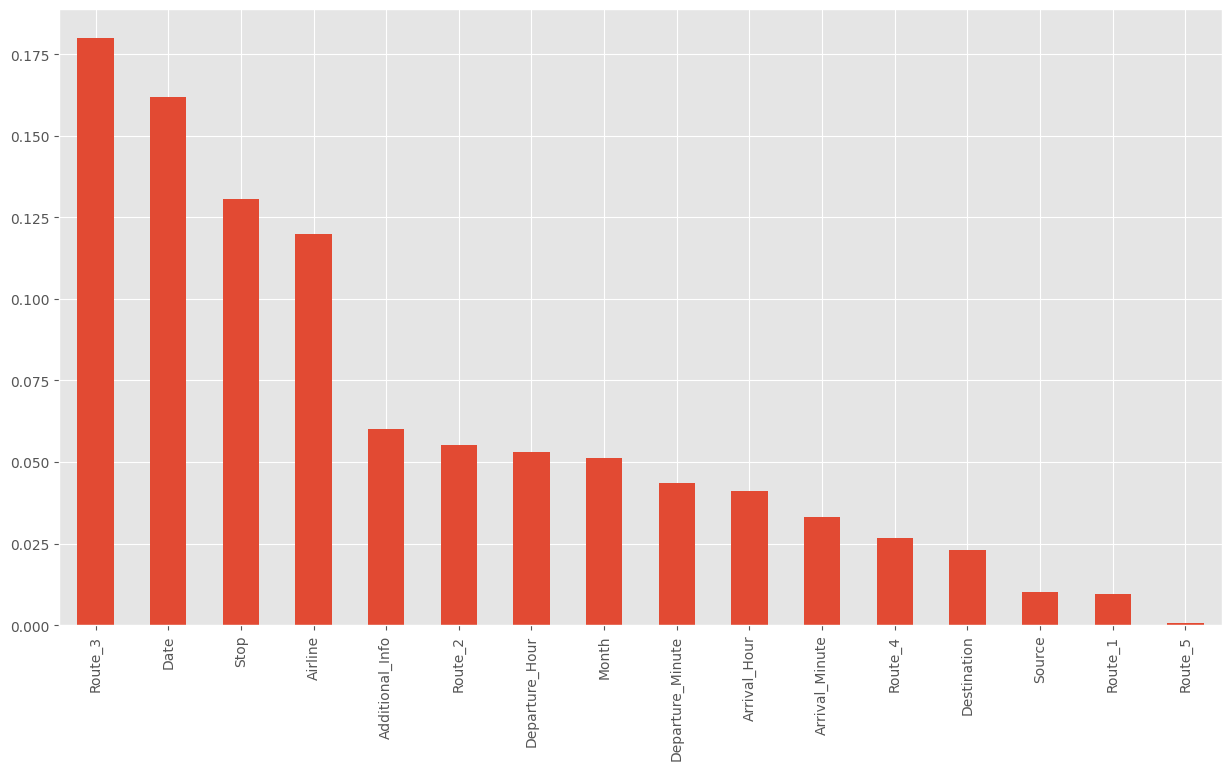

In [76]:
plt.style.use("ggplot")
plt.figure(figsize = (15,8))
feature_importances = pd.Series(etr.feature_importances_, index=x.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

### Importing our model

In [77]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [78]:
y_pred = reg_rf.predict(x_test)

In [79]:
reg_rf.score(x_train, y_train)

0.9474433412942154

In [80]:
reg_rf.score(x_test, y_test)

0.621102982415489

/tmp/ipykernel_4425/1894552590.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


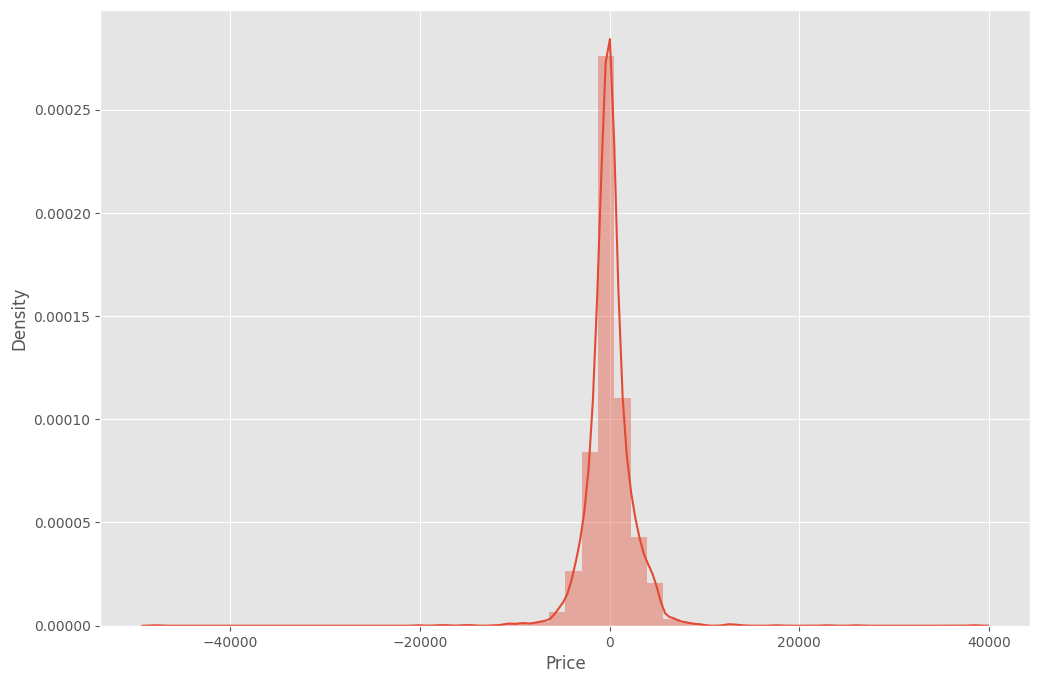

In [81]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred)
plt.show()

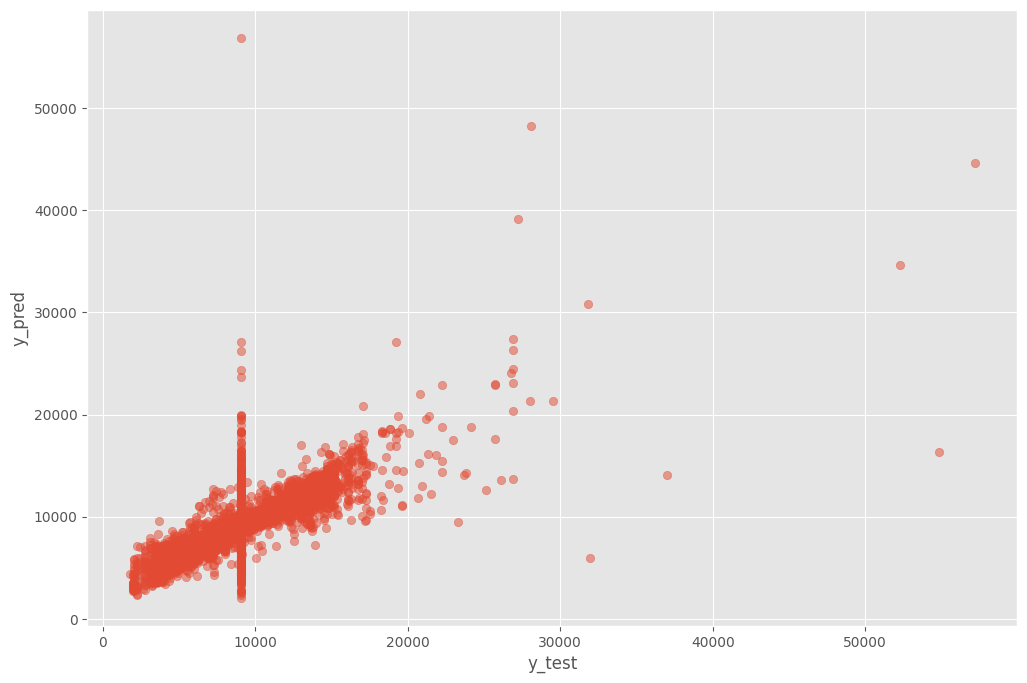

In [82]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [83]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1525.7084792523788
MSE: 6299464.590243906
RMSE: 2509.8734211597016


In [84]:
metrics.r2_score(y_test, y_pred)

0.621102982415489

### Hypertuning our Model

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [87]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [88]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [89]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1100; total time=   6.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1100; total time=   7.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1100; total time=   7.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   2.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1100; total time=   8.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   2.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1

/media/rahemur0910/ExtraSSD/backup_files/code/Flight-Fare-Detection-Using-SK-Learn/jupyter_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "/media/rahemur0910/ExtraSSD/backup_files/code/Flight-Fare-Detection-Using-SK-Learn/jupyter_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/media/rahemur0910/ExtraSSD/backup_files/code/Flight-Fare-Detection-Using-SK-Learn/jupyter_env/lib/python3.11/site-packages/sklearn/base.p

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [91]:
reg_rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split=3,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 15)

In [92]:
reg_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [93]:
ypred1= reg_rf.predict(x_test)

In [94]:
ypred1

array([10283.30875937,  9016.53567882,  8667.83305481, ...,
        4405.59936519,  7824.73643248,  9993.08205485], shape=(4007,))

/tmp/ipykernel_4425/1552327531.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-ypred1)


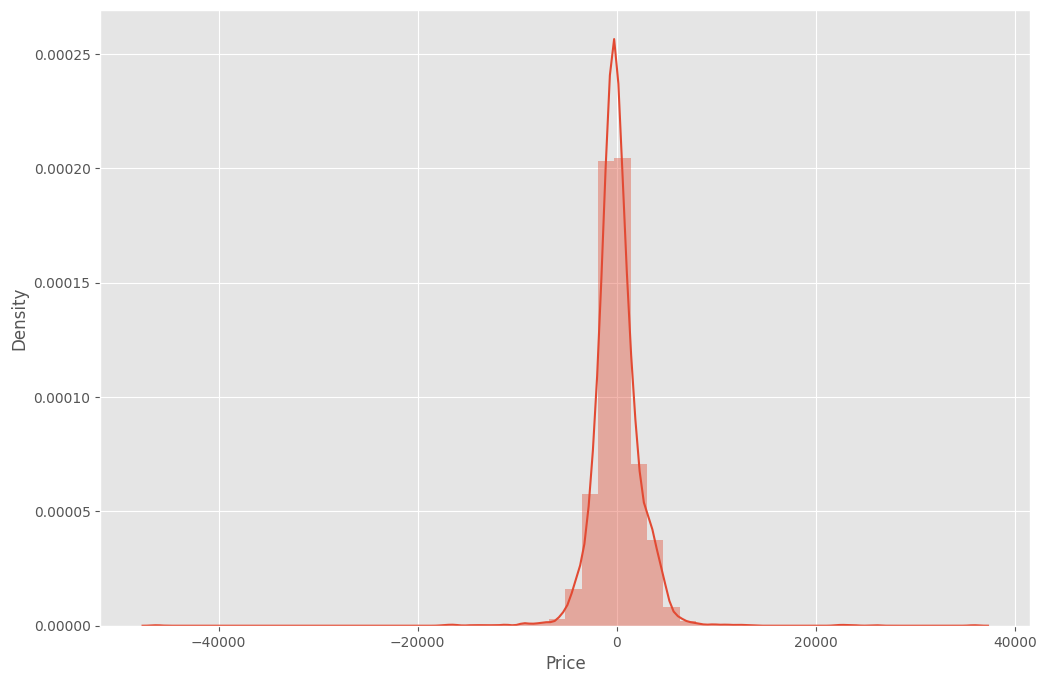

In [95]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred1)
plt.show()

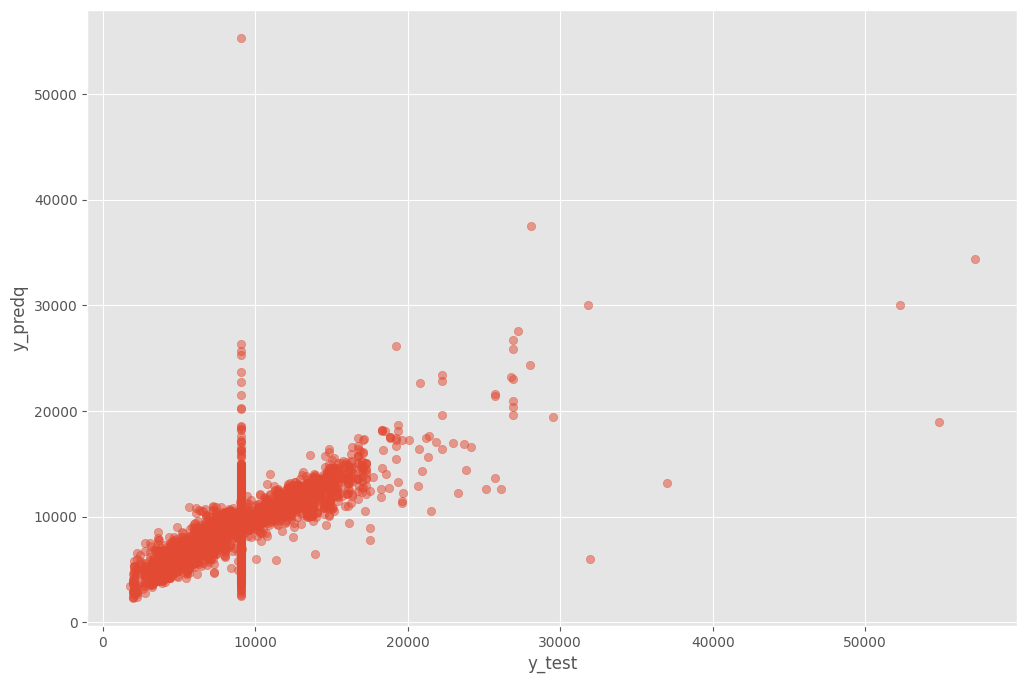

In [96]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predq")
plt.show()

In [97]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred1))
print('MSE:', metrics.mean_squared_error(y_test, ypred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred1)))

MAE: 1556.5140811680715
MSE: 6067906.897999553
RMSE: 2463.31218037819


In [98]:
metrics.r2_score(y_test, ypred1)

0.6350305976490148

# Using Auto SK Learn(Auto ML)

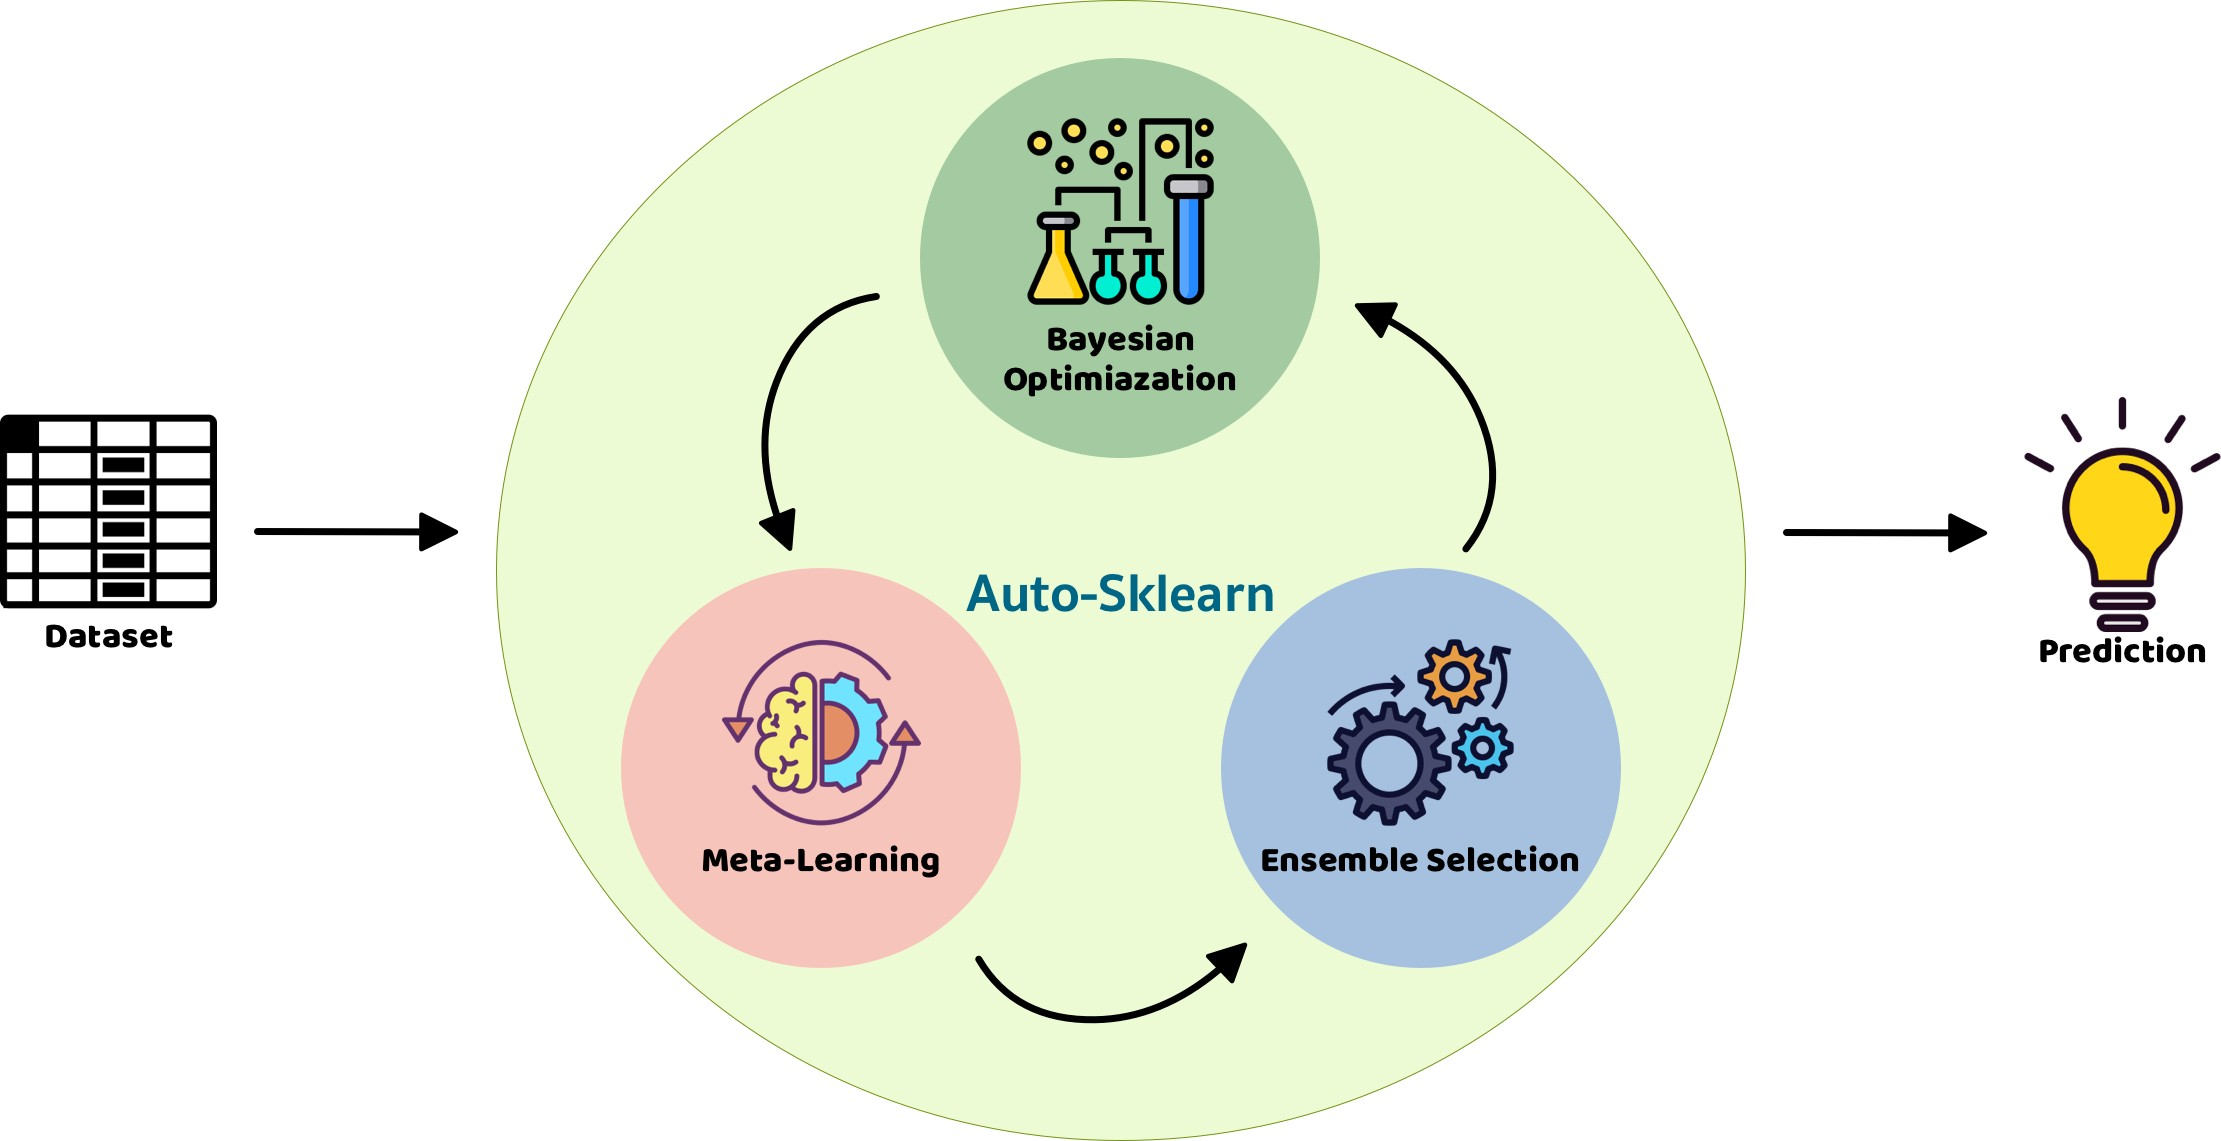

## Auto SK Learn: 

### !sudo apt-get install swig -y
auto-sklearn frees a machine learning user from algorithm selection and hyperparameter tuning. It leverages recent advantages in Bayesian optimization, meta-learning and ensemble construction.

In [ ]:
# Step-by-step install for auto-sklearn and its dependencies

# Ensure pip is available
!python -m ensurepip --upgrade

# Install system-level dependency
!apt-get install swig -y

# Install required Python packages
!pip install Cython numpy
!pip install scikit-learn
!pip install auto-sklearn


: 

In [100]:
import autosklearn

ModuleNotFoundError: No module named 'autosklearn'

In [ ]:
import autosklearn.regression as reg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/flight data.csv")

In [ ]:
df.head()

In [ ]:
df1= pd.read_csv("/content/drive/MyDrive/flight test.csv")

We will use the same x_train and y_train data

In [ ]:
x_train

In [ ]:
automl = reg.AutoSklearnRegressor(time_left_for_this_task=120,per_run_time_limit=30)

In [ ]:
automl.fit(x_train,y_train)

In [ ]:
print(automl.leaderboard())

In [ ]:
print(automl.show_models())

In [ ]:
ypred2= automl.predict(x_test)

In [ ]:
ypred2

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred2)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("ypred2")
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred2))
print('MSE:', metrics.mean_squared_error(y_test, ypred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred2)))